In [1]:
import pandas as pd 
aggregated = pd.read_pickle('../../data/Aggregated.pkl')

In [2]:
topics = pd.read_pickle('../../data/large_topics_proportions_df.pkl')

In [3]:
lm_sent = pd.read_pickle('../../data/LoughranMcDonald/earnings_sentiment.pkl')

In [4]:
vader = pd.read_pickle('../../data/SentimentVader/vader_sentiment.pkl')

In [5]:
aggregated = aggregated.reset_index(drop=True)

In [6]:
df = pd.concat([aggregated, topics, lm_sent, vader], axis=1)

In [7]:
df = df.sort_values(by='meeting_date')

In [8]:
trial = df.iloc[:, 10:]

In [9]:
train_size = int(len(trial) * 0.7)
val_size = int(len(trial) * 0.15)
train_data = trial[:train_size]
val_data = trial[train_size:train_size+val_size]
test_data = trial[train_size+val_size:]

In [10]:
# training
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# validation
X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

# test
X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100)  # You can adjust parameters as needed
clf.fit(X_train, y_train)

# Validate the model
y_val_pred = clf.predict(X_val)

In [12]:
clf_report = classification_report(y_val, y_val_pred)
print(f"Classification report:\n {clf_report}")

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      8547
           1       0.82      0.94      0.88     11931

    accuracy                           0.85     20478
   macro avg       0.86      0.83      0.84     20478
weighted avg       0.85      0.85      0.84     20478



In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions and evaluate
gby_pred = gb_classifier.predict(X_test) 
gb_report = classification_report(y_test, gby_pred)

print(f"Classification report of GB:  {gb_report}")


Classification report of GB:                precision    recall  f1-score   support

           0       0.96      0.79      0.87     13853
           1       0.68      0.93      0.79      6626

    accuracy                           0.84     20479
   macro avg       0.82      0.86      0.83     20479
weighted avg       0.87      0.84      0.84     20479



In [14]:
clf.feature_importances_

array([0.10515168, 0.03085521, 0.13120933, 0.19727411, 0.03483958,
       0.03260162, 0.03191109, 0.02890301, 0.03152519, 0.02887899,
       0.02813008, 0.03031018, 0.0302171 , 0.02897769, 0.03182318,
       0.03031058, 0.02603406, 0.02937849, 0.02540508, 0.03144765,
       0.02631825, 0.02849785])

In [15]:
from sklearn.inspection import permutation_importance

# Assuming rf is your trained Random Forest model
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)
result


{'importances_mean': array([ 0.27335645, -0.00976122,  0.30767453,  0.24023797, -0.01057669,
        -0.01335514, -0.00460797, -0.00378599, -0.0058857 , -0.00284845,
        -0.00341162, -0.00422058, -0.00384784, -0.00240083, -0.00264173,
        -0.00298354, -0.002575  ,  0.00129889, -0.00076338, -0.00107915,
        -0.00437359, -0.00573596]),
 'importances_std': array([0.00280756, 0.000896  , 0.00308581, 0.00209998, 0.00125179,
        0.00084697, 0.00111746, 0.00073654, 0.00067175, 0.00064748,
        0.00079767, 0.00081306, 0.00084327, 0.00079681, 0.00075778,
        0.00063334, 0.00071821, 0.00085023, 0.00076872, 0.00098289,
        0.00077687, 0.00091647]),
 'importances': array([[ 2.70960496e-01,  2.72230089e-01,  2.71790615e-01,
          2.77161971e-01,  2.73499683e-01,  2.70911666e-01,
          2.75745886e-01,  2.73450852e-01,  2.73402022e-01,
          2.73646174e-01,  2.73743835e-01,  2.69642072e-01,
          2.68421310e-01,  2.75355242e-01,  2.73353191e-01,
          2.

In [17]:
pd.DataFrame({
    'FeatureName': X_train.columns,
    'FeatureImportance': clf.feature_importances_,
    'FeaturePermutationMean': result.importances_mean,
    'FeaturePermutationSD':result.importances_std}).reset_index(drop=True)#.to_csv('../../data/features_importance2.csv', index=False)


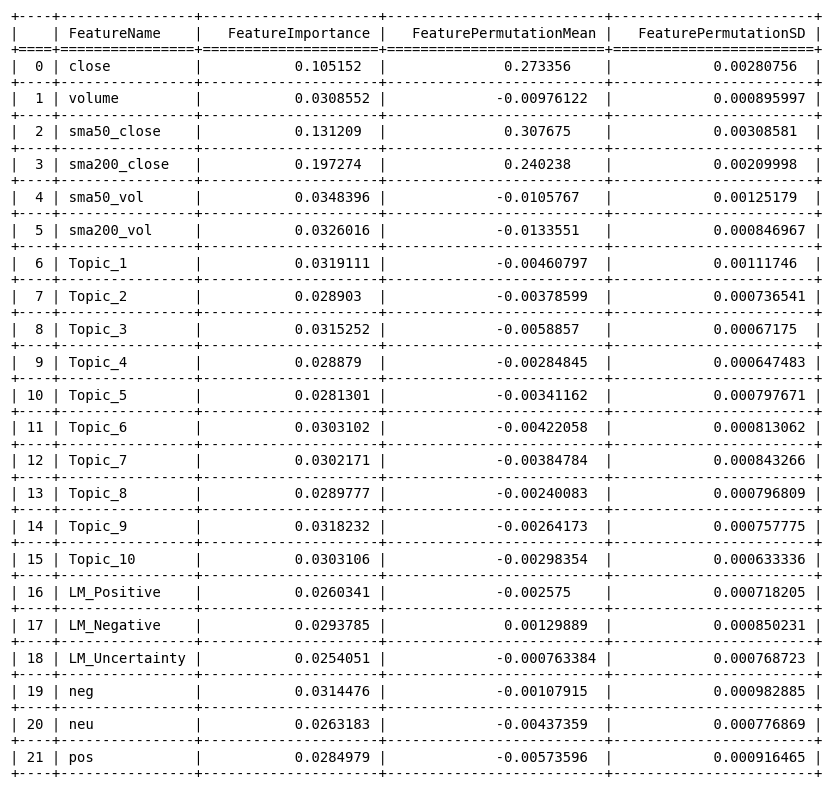

In [19]:
from tabulate import tabulate
from matplotlib import pyplot as plt

features_df = pd.read_csv('../../data/features_importance2.csv')

# Convert DataFrame to a tabulated format and print
table_head = tabulate(features_df, headers='keys', tablefmt='grid')

# Create a matplotlib figure and add the tabulated text as an annotation
fig, ax = plt.subplots(figsize=(8, 6))
ax.text(0, 1, table_head, va='top', fontfamily='monospace', fontsize=10, transform=ax.transAxes)
ax.axis('off')  # Turn off axes

# Save the figure as an image file (e.g., PNG)
#fig.savefig('../../docs/results/feature_importance_permutations2.png', bbox_inches='tight', pad_inches=0.1, dpi=200)